# Katherine Perkins Capstone

The main data set that I will be exploring was made available via the United States Department of Agriculture Economic Research Service. It is an Excel file and explores dairy consumption per capita in the United States from 1975-2017. This data set contains information regarding the changes in consumption of various types of dairy, but I will be focusing on milk, yogurt, and overall dairy consumption.

## Analytical Questions

1) What is the overall trend from 1975-present?

2) Does the same trend occur for all types of dairy?

3) Is there a correlation between choice of milk and weight trends in the United States?


In [107]:
import numpy as np
import pandas as pd
from numpy.random import seed
from numpy.random import randn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
from scipy import stats
from scipy.stats import sem
from scipy.stats import ttest_ind
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statistics
from math import sqrt
%matplotlib inline

# read excel file and upload into pandas dataframe
df_import = pd.read_excel('dairy_con.xlsx', usecols=[0, 1, 2, 12, 13, 22], 
                   names=['Year', 'Fluid Milk', 'Yogurt', 'Ice Cream', 'Frozen Yogurt', 'All Dairy'], skiprows=10)

# round values
df = df_import.round(decimals=2)

# removal of NaN cells
df.dropna(inplace=True)

# set index of dataframe as year column
df.set_index('Year')

df.head()

,Year,Fluid Milk,Yogurt,Ice Cream,Frozen Yogurt,All Dairy
0,1975,247.0,1.97,18.21,6.50,539.0
1,1976,247.0,2.13,17.64,6.17,540.0
2,1977,244.0,2.34,17.29,6.57,540.0
3,1978,241.0,2.45,17.23,6.55,544.0
4,1979,238.0,2.44,16.94,6.20,548.0


# 1. Trends over Time

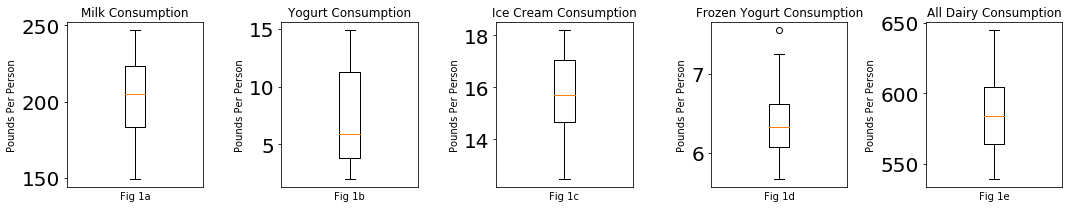

In [108]:
#exploring data through boxplots of each column
plt.figure(figsize=(15, 3))

plt.subplot(1, 5, 1)
plt.boxplot(df['Fluid Milk'])
plt.title('Milk Consumption')
plt.ylabel('Pounds Per Person')
plt.xlabel('Fig 1a')

# remove the 1 and the tickmark from the bottom axis
plt.tick_params(
    axis='x',
    bottom=False,
    labelbottom=False
)
plt.tight_layout()

plt.subplot(1, 5, 2)
plt.boxplot(df['Yogurt'])
plt.title('Yogurt Consumption')
plt.ylabel('Pounds Per Person')
plt.xlabel('Fig 1b')

plt.tick_params(
    axis='x',
    bottom=False,
    labelbottom=False
)
plt.tight_layout()

plt.subplot(1, 5, 3)
plt.boxplot(df['Ice Cream'])
plt.title('Ice Cream Consumption')
plt.ylabel('Pounds Per Person')
plt.xlabel('Fig 1c')

plt.tick_params(
    axis='x',
    bottom=False,
    labelbottom=False
)
plt.tight_layout()


plt.subplot(1, 5, 4)
plt.boxplot(df['Frozen Yogurt'])
plt.title('Frozen Yogurt Consumption')
plt.ylabel('Pounds Per Person')
plt.xlabel('Fig 1d')

plt.tick_params(
    axis='x',
    bottom=False,
    labelbottom=False
)
plt.tight_layout()

plt.subplot(1, 5, 5)
plt.boxplot(df['All Dairy'])
plt.title('All Dairy Consumption')
plt.ylabel('Pounds Per Person')
plt.xlabel('Fig 1e')

plt.tick_params(
    axis='x',
    bottom=False,
    labelbottom=False
)
plt.tight_layout()

When analyzing the boxplot data, it is an interesting to note when exploring this data, that there is really only one outlier. It is also clear that fluid milk is consumed on a much greater scale than any other type of dairy. 

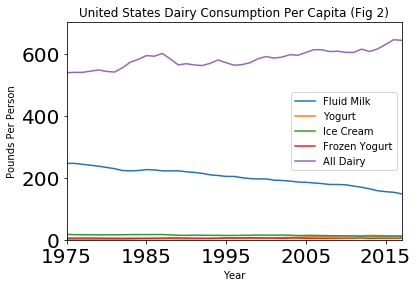

In [109]:
# plots columns contained in dataframe to visualize trends
df.plot(kind='line', x='Year')
plt.title('United States Dairy Consumption Per Capita (Fig 2)')
plt.ylabel('Pounds Per Person')
plt.ylim([1, 701])
plt.show()



Because the amounts of fluid milk, and of course, overall dairy consumed are on such a large scale, it makes it difficult to note the trends of the other columns. I will need to rescale this data to better compare trends.

# 2. Breaking Down Trends for Various Dairy Types

<Figure size 720x360 with 0 Axes>

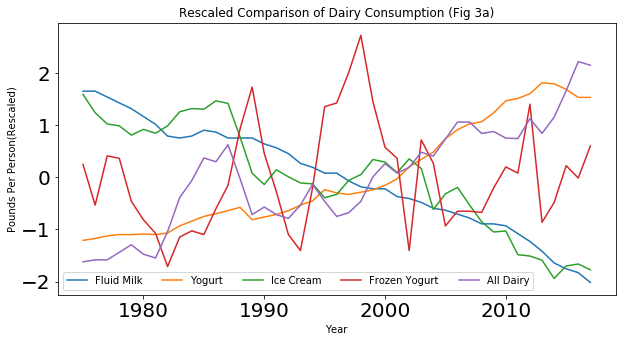

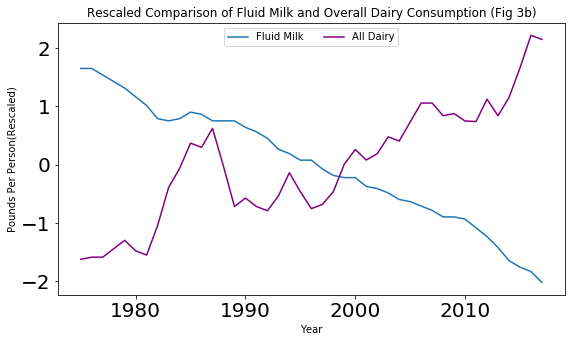

In [110]:
plt.figure(figsize=(10, 5))
year = [np.int(i) for i in df['Year']]
scaler = StandardScaler()
    
dairy_list = ['Fluid Milk', 'Yogurt', 'Ice Cream', 'Frozen Yogurt', 'All Dairy']

plt.figure(figsize=(10, 5))

for i in dairy_list:

    val = scaler.fit_transform(np.array(df[i]).reshape(-1, 1))
    
    plt.plot(year, val, label=i)
    
plt.ylabel('Pounds Per Person(Rescaled)')
plt.xlabel('Year')
plt.title('Rescaled Comparison of Dairy Consumption (Fig 3a)')
plt.legend(frameon=True, loc='best', ncol=5)
plt.show()

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)

milk_scaled = scaler.fit_transform(df['Fluid Milk'].values.reshape(-1, 1))
all_dairy_scaled = scaler.fit_transform(df['All Dairy'].values.reshape(-1, 1))

plt.plot(year, milk_scaled, label='Fluid Milk')
plt.plot(year, all_dairy_scaled, label='All Dairy', color='purple')

plt.ylabel('Pounds Per Person(Rescaled)')
plt.xlabel('Year')
plt.title('Rescaled Comparison of Fluid Milk and Overall Dairy Consumption (Fig 3b)')
plt.legend(frameon=True, loc='upper center', ncol=2)
plt.show()

Now that the data has been rescaled, it is much easier to note a few things. First, it can be seen in Fig 3, that while fluid milk is consumed on a much larger scale, conumption has been on a steady decline. Decadent ice cream has also been on an overall decline, even though it has vacillated somewhat from year to year. Frozen yogurt was created as a "healthier" alternative to ice cream, but is the most erratically consumed of all types analyzed. Regular yogurt, however, is the only type analyzed here that has steadily increased.

In Fig 3b, I further explored the trends between fluid milk consumption and overall dairy consumption. It is clear that while fluid milk consumption has definitely declined, overall dairy consumption has risen over the years. Perhaps this increase is just due to the large change of population from 1975-2017. It is my hypothesis, that these changes can also be credited in part to dietary recommendations and what people perceive as healthy. I decided to further break down the consumption of fluid milk to see what trends occur within that specific type of dairy.

In [111]:
#importing of dataset that displays breakdown of types of milk consumed
df_milk_types_import = pd.read_excel('fluidmilk.xlsx', usecols=[0, 1, 2, 3, 4,], 
                   names=['Year', 'Whole', 'Two Percent Fat', 'One Percent Fat', 'Skim'], skiprows=1)

#eliminates cells and columns with no entries
df_milk_types_import.dropna(inplace=True)

df_milk_types = df_milk_types_import.round(decimals=2)
#sets 'Year' column as index
df_milk_types.set_index('Year')

df_milk_types.head()

,Year,Whole,Two Percent Fat,One Percent Fat,Skim
0,1975,36188.0,8726.0,2742.0,2480.0
1,1976,35241.0,9556.0,2875.0,2524.0
2,1977,34036.0,10423.0,3003.0,2617.0
3,1978,33235.0,11017.0,3233.0,2543.0
4,1979,32480.0,11762.0,3281.0,2604.0


<Figure size 1440x360 with 0 Axes>

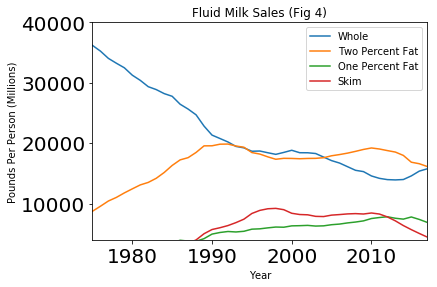

In [112]:
#exploration of trends of types of milk consumed
plt.figure(figsize=(20, 5))
df_milk_types.plot(kind='line', x='Year')
plt.title('Fluid Milk Sales (Fig 4)')
plt.ylabel('Pounds Per Person (Millions)')
plt.ylim([4000, 40000])

plt.show()

In Fig 5, we can see four types of milk plotted in order to compare their consumption trends. The first year for which we have data, is 1975, where whole milk was consumed at a very large scale. 1% reduced fat milk as well as skim milk are not even on the radar until the mid 1980's. This is making it somewhat difficult to compare all four types so I will have to rescale this data as well.

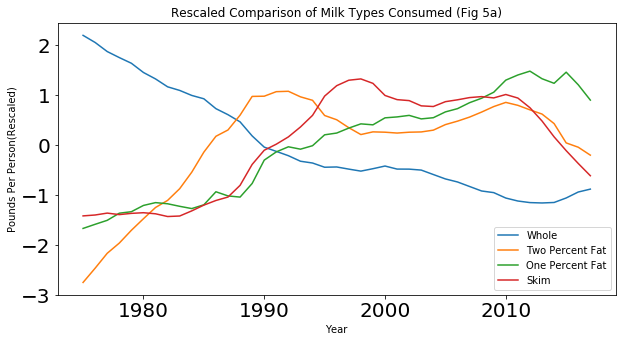

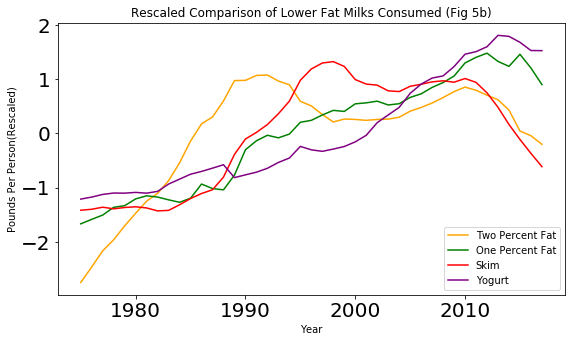

In [114]:
milk_list = ['Whole', 'Two Percent Fat', 'One Percent Fat', 'Skim']

plt.figure(figsize=(10, 5))

for i in milk_list:

    val = scaler.fit_transform(np.array(df_milk_types[i]).reshape(-1, 1))
    
    plt.plot(year, val, label=i)

plt.ylabel('Pounds Per Person(Rescaled)')
plt.xlabel('Year')

plt.title('Rescaled Comparison of Milk Types Consumed (Fig 5a)')
plt.legend(frameon=True, loc='lower right')
    
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)

plt.plot(year, red_fat_scaled, label='Two Percent Fat', color='orange')
plt.plot(year, low_fat_scaled, label='One Percent Fat', color='green')
plt.plot(year, skim_scaled, label='Skim', color='red')
plt.plot(year, yogurt_scaled, label='Yogurt', color='purple')

plt.ylabel('Pounds Per Person(Rescaled)')
plt.xlabel('Year')

plt.title('Rescaled Comparison of Lower Fat Milks Consumed (Fig 5b)')
plt.legend(frameon=True, loc='lower right')

plt.show()

Now that the data has been rescaled, we can see that whole milk was by far the milk type of choice until the mid 1980's where it becomes equally popular as 2% reduced fat milk. After this time, whole milk conumption continues to decline until very recent years where there is a slight uptick. By far, upon the advent of lower milk fat alternatives, it seems these types were preferred until the 2000's, where lower fat milks begin to decline and whole milk begins to return.


I decided to further explore these lower fat milk types and overlay yogurt itself to see if their trends were similar. It does seem as though 1% milk fat and yogurt consumption follow the same overall consumption trend. Both types of dairy have a steady increase with a slight recent downtick. It is my conclusion that this downtick would be caused by preference rather than population like the overall dairy trend, as there are other options available that have increased (whole milk). 


Again this information leads me to the question: could this preference change be related to what people perceive as healthy? In order to explore this question further, I decided to explore the correlation between overweight trends in the United States during this time period.

# 3. Analyzing Choice of Milk and U.S. Weight Trends

In [115]:
#import of data regarding trends of overweight adults in United States
df_weight = pd.read_csv('share-of-adults-who-are-overweight.csv', usecols=[0, 2, 3], 
                        names=['Country', 'Year', 'BMI Percentage >=25'], 
                        skiprows=7645, nrows=41)

#reorders columns and sets 'Year' column as index
df_weight_reorder = df_weight[['Year','Country','BMI Percentage >=25']]
df_weight_reorder.set_index('Year')


df_weight_reorder.head()

,Year,Country,BMI Percentage >=25
0,1975,United States,40.8
1,1976,United States,41.4
2,1977,United States,41.9
3,1978,United States,42.5
4,1979,United States,43.0


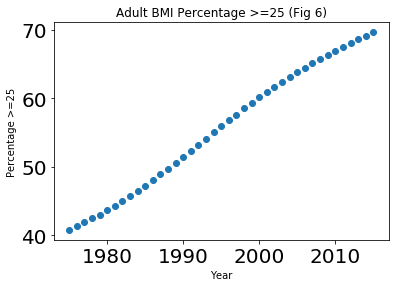

In [116]:
#changed to scatter plot of increased BMI over time
plt.scatter(x=df_weight_reorder['Year'], y=df_weight_reorder['BMI Percentage >=25'])


plt.ylabel('Percentage >=25')
plt.xlabel('Year')
plt.title('Adult BMI Percentage >=25 (Fig 6)')

plt.show()

Fig 6 above displays the percentage of adults in the US with an unhealthy BMI. BMI is derived from the mass and height of an individual and on average, a BMI greater than or equal to 25 is considered overweight. I would like to see how this data compares to the trends of types of milk consumed to see if there is a correlation, but first I need to explore this data and rescale it the same way I did earlier so everything is on the same scale.

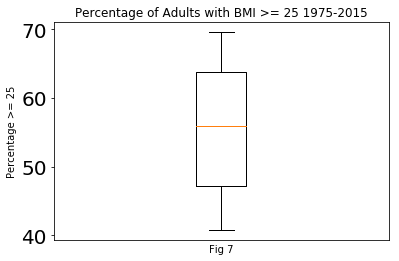

In [117]:
#exploration of data
plt.boxplot(df_weight_reorder['BMI Percentage >=25'])
plt.title('Percentage of Adults with BMI >= 25 1975-2015')
plt.ylabel('Percentage >= 25')
plt.xlabel('Fig 7')
plt.tick_params(
    axis='x',
    bottom=False,
    labelbottom=False
)
plt.show()


In [118]:
print('The median percentage of adults with a BMI greater than or equal to 25 from 1975-2015 is: {}'
      .format(np.median(df_weight_reorder['BMI Percentage >=25'])))
print('The standard deviation is: {}'.format(np.std(df_weight_reorder['BMI Percentage >=25'])))  

The median percentage of adults with a BMI greater than or equal to 25 from 1975-2015 is: 55.9
The standard deviation is: 9.119973047540457


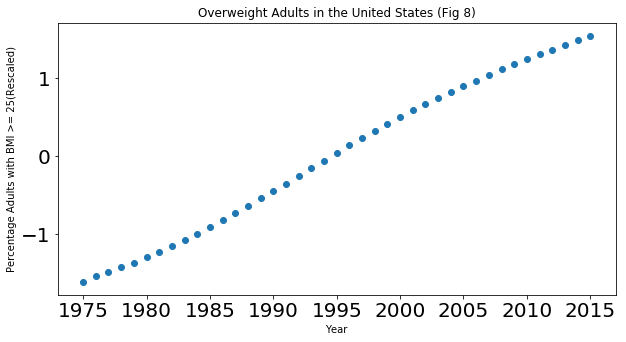

In [119]:
plt.figure(figsize=(10, 5))
year_weight = [np.int(i) for i in df_weight_reorder['Year']]

#rescale data
scaler = StandardScaler()
weight_scaled = scaler.fit_transform(df_weight_reorder['BMI Percentage >=25'].values.reshape(-1, 1))

plt.scatter(year_weight, weight_scaled)


plt.ylabel('Percentage Adults with BMI >= 25(Rescaled)')
plt.xlabel('Year')

plt.title('Overweight Adults in the United States (Fig 8)')

plt.show()

Here I have rescaled the same data regarding overweight adults. Now it is time to merge this data with my fluid milk data, to see if there is a correlation.

In [120]:
#merges information regarding overweight adults and consumption of types of milk
merge_df = pd.merge(df_milk_types,df_weight_reorder[['Year','BMI Percentage >=25']],on='Year', how='left')


Text(0.5, 1.0, 'Correlation of Adult Weight and Milk Choice (Fig 9)')

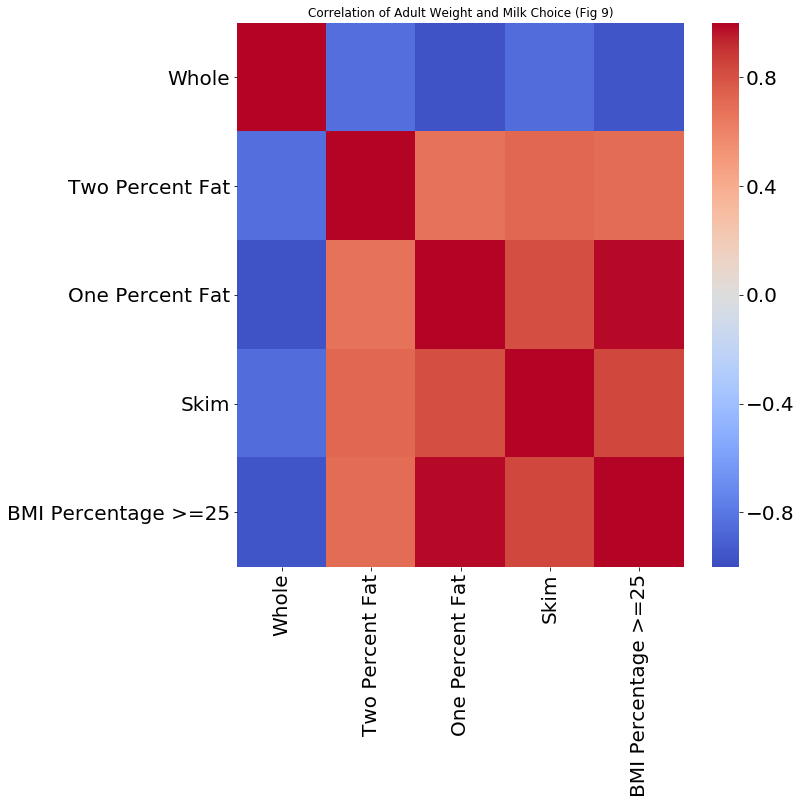

In [121]:
#plot merged data to explore correlation
plt.figure(figsize=(10,10))
sns.heatmap(merge_df.corr(),
            vmin=-1,
           cmap='coolwarm');

plt.title('Correlation of Adult Weight and Milk Choice (Fig 9)')

In Fig 9, we can now see that fewer adults were considered overweight when whole milk was consumed. 2% milk also seemed to be a better choice, while when 1% milk and skim were consumed at a higher rate, BMI was generally higher. I think it is safe to conclude that whole milk conumption does not negatively affect BMI and could be considered a healthier choice.

One other correlation that may be worthy of exploring, is whether gender has any affect on the instance of being categorized as overweight or obese. Below I will import and analyze data to further explor this new hypothesis.

In [122]:
#import of data regarding trends of overweight adult women in United States
df_women_import = pd.read_csv('share-of-women-defined-as-underweight-healthy-overweight-or-obese.csv', usecols=[0, 2, 5], 
                        names=['Country', 'Year', 'Overweight/Obese Percentage'], 
                        skiprows=7641, nrows=40)

#reorders columns and sets 'Year' column as index
df_women = df_women_import[['Year','Country','Overweight/Obese Percentage']]
df_women.set_index('Year')

df_women.head()

,Year,Country,Overweight/Obese Percentage
0,1975,United States,37.5
1,1976,United States,38.1
2,1977,United States,38.7
3,1978,United States,39.4
4,1979,United States,40.1


In [123]:
#import of data regarding trends of overweight adult women in United States
df_men_import = pd.read_csv('men-weight-categories.csv', usecols=[0, 2, 5], 
                        names=['Country', 'Year', 'Overweight/Obese Percentage'], 
                        skiprows=7641, nrows=40)

#reorders columns and sets 'Year' column as index
df_men = df_men_import[['Year','Country','Overweight/Obese Percentage']]
df_men.set_index('Year')

df_men.head()

,Year,Country,Overweight/Obese Percentage
0,1975,United States,47.5
1,1976,United States,48.2
2,1977,United States,48.8
3,1978,United States,49.5
4,1979,United States,50.1


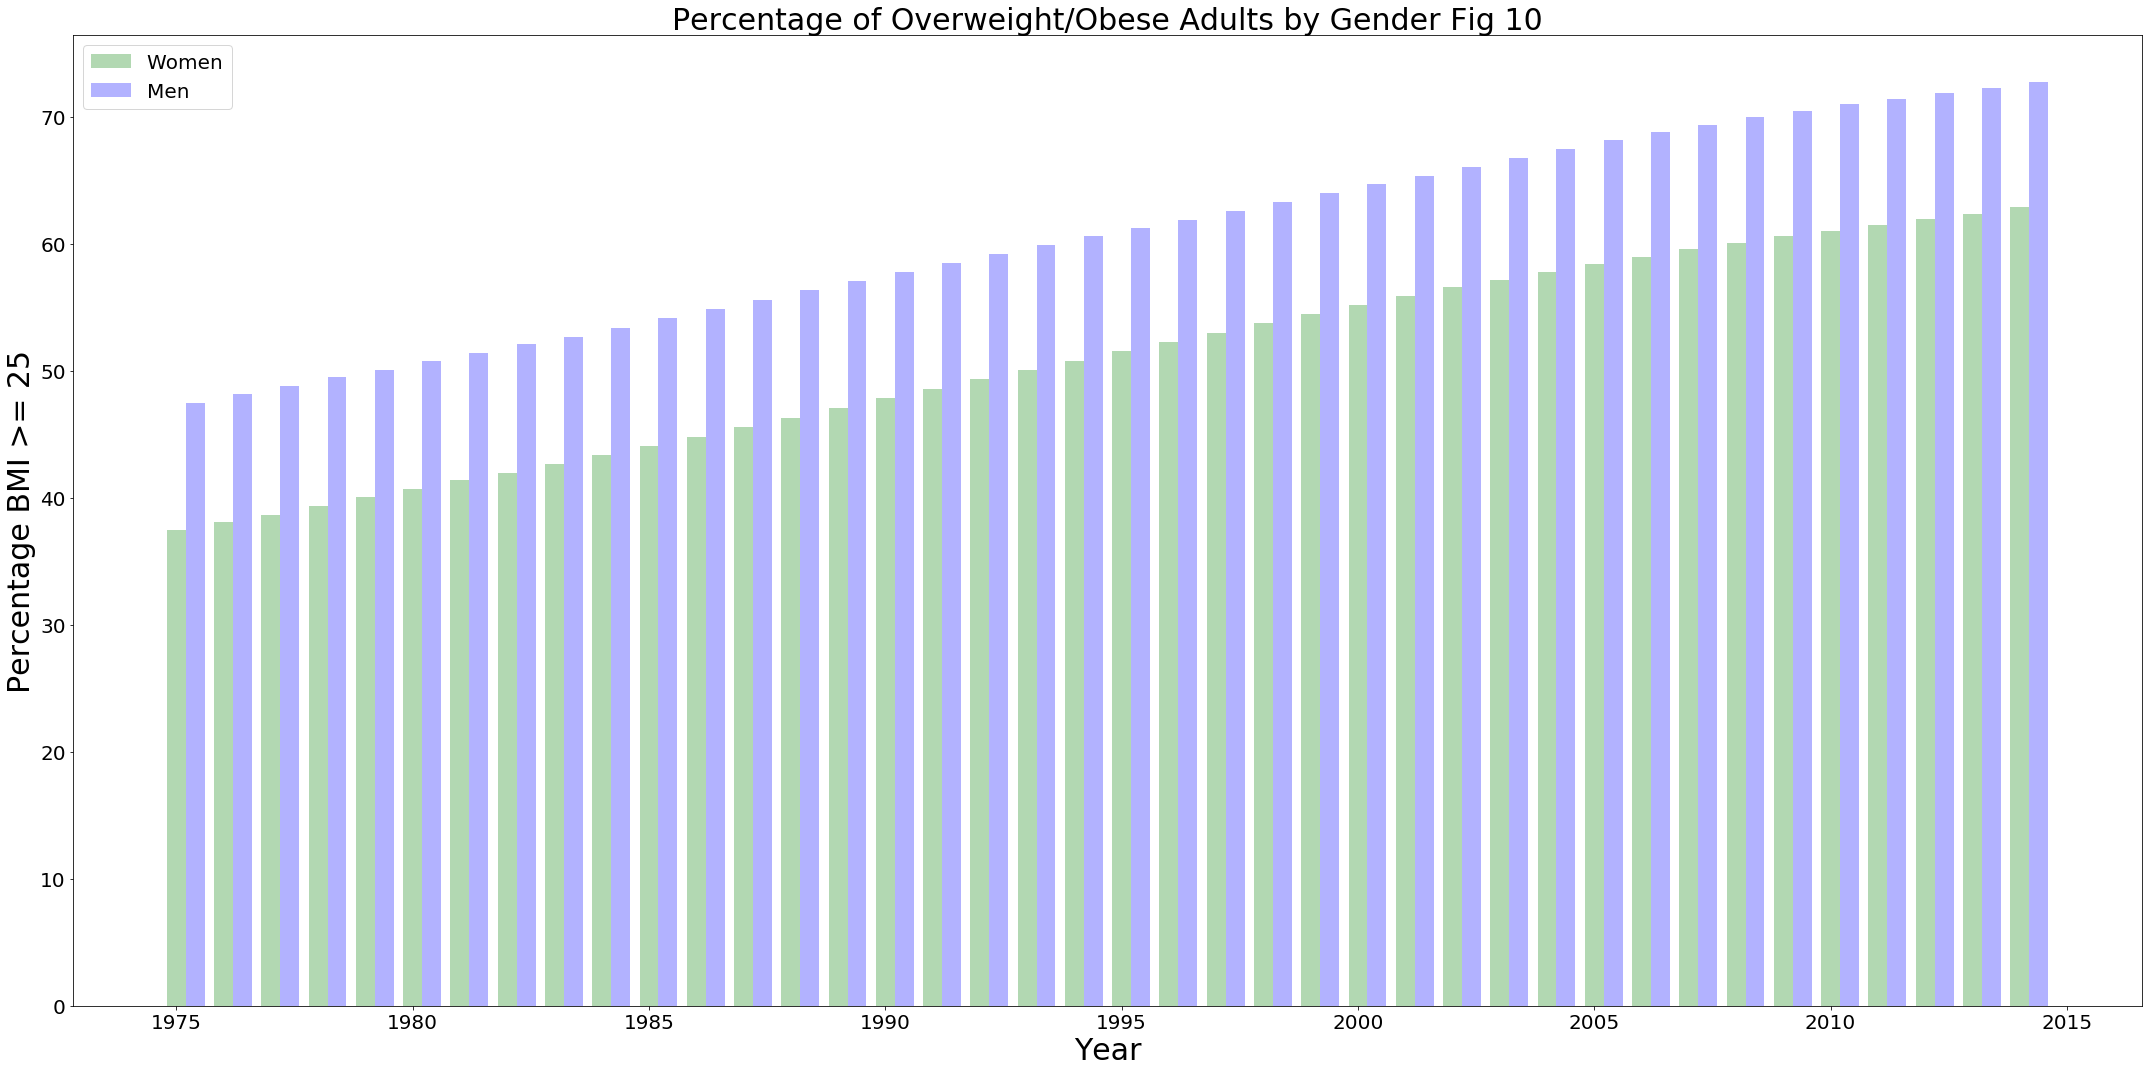

In [124]:
# data to plot
n_groups = 40
bmi_women = list(df_women['Overweight/Obese Percentage'])
bmi_men = list(df_men['Overweight/Obese Percentage'])

# create plot
fig, ax = plt.subplots(figsize=(30, 15))
index = df_women['Year']
bar_width = 0.4
opacity = 0.3

rects1 = plt.bar(index, bmi_women, bar_width,
alpha=opacity,
color='g',
label='Women')

rects2 = plt.bar(index + bar_width, bmi_men, bar_width,
alpha=opacity,
color='b',
label='Men')

plt.xlabel('Year', fontsize = 30)
plt.ylabel('Percentage BMI >= 25', fontsize = 30)
plt.title('Percentage of Overweight/Obese Adults by Gender Fig 10', fontsize = 30)

plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.legend(fontsize = 20)

plt.tight_layout()
plt.show()

It is clear from a comparison bar chart, that men historically have a much higher rate of overweight/obesity than women. However, in order to confirm this mathematically, some statisical analysis is needed.

In [125]:
#creation of function to calculate t-value and p-value
alpha = 0.5
def independent_ttest(bmi_women, bmi_men, alpha):
    # calculate means
    mean1, mean2 = statistics.mean(bmi_women), statistics.mean(bmi_men)
    # calculate standard errors
    se1, se2 = sem(bmi_women), sem(bmi_men)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    degfree = len(bmi_women) + len(bmi_men) - 2
    # calculate the critical value
    cv = stats.t.ppf(1.0 - alpha, degfree)
    # calculate the p-value
    p = (1.0 - stats.t.cdf(abs(t_stat), degfree)) * 2.0
   

print(t_stat, p)


-5.564849942089641 3.564818988888163e-07


After running some statistical analysis on my new gender breakdowns, we have a mathematical confirmation through our p-value that men are more likely to have an instance of being categorized as overweight or obese. Our t-value also indicates that the null hypothesis that gender is not an indicator of likelihood of obesity is incorrect.

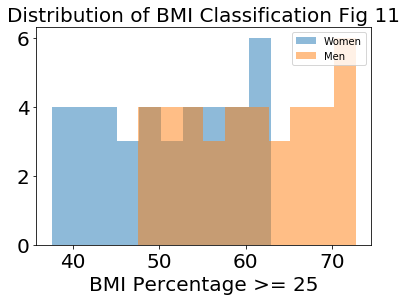

In [126]:
plt.hist(bmi_women, alpha=0.5, label='Women') 
plt.hist(bmi_men, alpha=0.5, label='Men') 

plt.xlabel('BMI Percentage >= 25', fontsize = 20)

plt.title('Distribution of BMI Classification Fig 11', fontsize = 20)
plt.legend(loc='upper right') 
plt.show()

As we can see in Fig 11, while, both genders have quite a bit of overlap, men have a much higher instance of being classified as overweight/obese.

# Summary
According to the data collected, dairy consumption has continued to rise through the years, but not necessarily by drinking milk as milk consumption continues to decline. While low fat milks and yogurts rose in popularity from the 1980's on, their consumption has taken a downward turn and whole milk is beginning to be favored once again.

Just as general dairy and low fat milk consumption has risen, so has the instance of overweight/obese adults. It is clear from the data provided that when whole milk was consumed at a greater scale, fewer people were considered overweight or obese. Furthermore, those that are classified as overweight or obese, or more often male than female.

# Questions to Continue Research
I would like to continue the comparison of diet trends and consider the advent of non-dairy milk options and how their promotion has affected dairy consumption. Just as I noted that low fat milks really did not grow in popularity until the mid 1980's, non-dairy milks such as soy, almond, hemp, etc. are gaining traction. However, as we have seen, popularity does not equate a positive affect on health or weight. 

It would also be helpful to explore the trends of health issues such as heart disease or diabetes and how those trends compare to what we have explored here with BMI and dairy choices. Perhaps once all of these data types have been compiled, a predictive model could be created to predict the likelihood of developing obesity, heart disease, or diabetes based on specific types of dairy consumption choices.

Resources: https://ourworldindata.org/obesity, https://www.ers.usda.gov/data-products/dairy-data.aspx